# Neural Networks image recognition - ConvNet

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.
4. Compare these results with the previous week where we used a MultiLayer Perceptron (this week we use a ConvNet). 

# Neural Networks - Image Recognition 

In [63]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

In [64]:
import matplotlib.pyplot as  plt
%matplotlib inline
import numpy as np

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [101]:
# input image dimensions
img_rows, img_cols = 28, 28

scale = [0, .1, .5, 1.0, 2.0, 4.0]
batch_size = 128
num_classes = 10
epochs = 12

losses = []
acc = []

In [102]:
for s in scale:
    # the data, shuffled and split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential()

    if backend.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    new_train = x_train + np.random.normal(0, s, size=(60000, 28, 28, 1))
    new_test = x_test + np.random.normal(0, s, size=(10000, 28, 28, 1))
    print('new_train shape:', new_train.shape)
    print('new_test shape:', new_test.shape)

    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

    model.fit(new_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(new_test, y_test))
    score = model.evaluate(new_test, y_test, verbose=0)
    losses.append(score[0])
    acc.append(score[1])
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

new_train shape: (60000, 28, 28, 1)
new_test shape: (10000, 28, 28, 1)
Epoch 1/12
469/469 [==============================] - 43s 85ms/step - loss: 2.2817 - accuracy: 0.1517 - val_loss: 2.2442 - val_accuracy: 0.3532
Epoch 2/12
469/469 [==============================] - 42s 90ms/step - loss: 2.2259 - accuracy: 0.2674 - val_loss: 2.1766 - val_accuracy: 0.5228
Epoch 3/12
469/469 [==============================] - 44s 94ms/step - loss: 2.1565 - accuracy: 0.3756 - val_loss: 2.0899 - val_accuracy: 0.6190
Epoch 4/12
469/469 [==============================] - 44s 94ms/step - loss: 2.0671 - accuracy: 0.4588 - val_loss: 1.9754 - val_accuracy: 0.6806
Epoch 5/12
469/469 [==============================] - 44s 93ms/step - loss: 1.9494 - accuracy: 0.5142 - val_loss: 1.8269 - val_accuracy: 0.7176
Epoch 6/12
469/469 [==============================] - 40s 85ms/step - loss: 1.8055 - accuracy: 0.5545 - val_loss: 1.6462 - val_accuracy: 0.7439
Epoch 7/12
469/469 [==============================] - 43s 91ms/st

469/469 [==============================] - 42s 89ms/step - loss: 2.3019 - accuracy: 0.1160 - val_loss: 2.2934 - val_accuracy: 0.1442
Epoch 6/12
469/469 [==============================] - 43s 91ms/step - loss: 2.2966 - accuracy: 0.1209 - val_loss: 2.2908 - val_accuracy: 0.1530
Epoch 7/12
469/469 [==============================] - 44s 94ms/step - loss: 2.2956 - accuracy: 0.1215 - val_loss: 2.2885 - val_accuracy: 0.1619
Epoch 8/12
469/469 [==============================] - 41s 87ms/step - loss: 2.2932 - accuracy: 0.1249 - val_loss: 2.2849 - val_accuracy: 0.1724
Epoch 9/12
469/469 [==============================] - 43s 92ms/step - loss: 2.2913 - accuracy: 0.1280 - val_loss: 2.2813 - val_accuracy: 0.1808
Epoch 10/12
469/469 [==============================] - 44s 94ms/step - loss: 2.2877 - accuracy: 0.1319 - val_loss: 2.2766 - val_accuracy: 0.1882
Epoch 11/12
469/469 [==============================] - 40s 86ms/step - loss: 2.2835 - accuracy: 0.1389 - val_loss: 2.2707 - val_accuracy: 0.1991
E

In [110]:
losses_MLP = [0.0719, 0.1039, 0.1362, 0.1539, 0.2294, 0.8322]
acc_MLP = [0.9815, 0.9801, 0.9781, 0.9752, 0.9561, 0.6791]

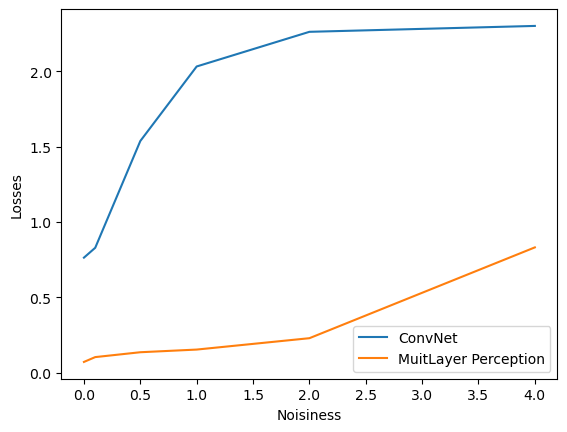

In [111]:
plt.figure()
plt.plot(scale, losses, label="ConvNet")
plt.plot(scale, losses_MLP, label="MuitLayer Perception")
plt.xlabel('Noisiness')
plt.ylabel('Losses')
plt.legend()
plt.show()

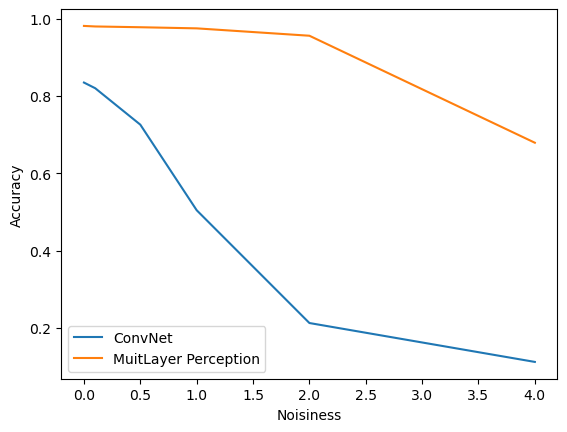

In [112]:
plt.figure()
plt.plot(scale, acc, label="ConvNet")
plt.plot(scale, acc_MLP, label="MuitLayer Perception")
plt.xlabel('Noisiness')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### The number of epochs used for this assignment (ConvNet) is smaller than last week's assignment using MultiLayer Perception - 12 epochs for ConvNet compared to 20 for MultiLayer Perception, but even so the accuracy is much higher and the losses lower for MultiLayer Percenption within 12 epochs as noise increases. With no noise at all, the MultiLayer Perception at 12 epochs had 98% accuracy and less than 0.1 in losses where the ConvNet with no noise had an accuracy at 83% and 0.7 in losses.